# Project: Investigate a Dataset - [Database_No_show_appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
This Data Consist of :
 PatientId	:Identification of a patient;	
 Gender	: Male or Female 	;
 AppointmentDay	:The day of the actuall appointment, when they have to visit the doctor. ;
 Age	: How old is the patient.  ;
 Neighbourhood	:Where the appointment takes place. ; 
 Scholarship	,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received	:True of False  ;
 No-show :NO or Yes ;


### Question(s) for Analysis
##### The main Question :What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [3]:
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


In [4]:
pd.set_option('display.max_rows',None)

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.dtypes.to_frame().T

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,float64,int64,object,object,object,int64,object,int64,int64,int64,int64,int64,int64,object


In [7]:
unique_columns=[ 'Gender','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

In [8]:
for i in unique_columns:
    print(df[i].unique())

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Does n't exist null value

##### column of Handcap should True or False not (0,1,2,3,4) i will convert it

In [10]:
def convert(x):
    if x>0:
        return 1
    else:
        return 0
df['Handcap']=df['Handcap'].apply(convert)    

In [11]:
df['Handcap'].value_counts()
# 1 for handcap and 0 for no_handcap

0    108286
1      2241
Name: Handcap, dtype: int64

change date into datetime

In [12]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%d %H:%M:%S')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%d %H:%M:%S')

we want mack a secation dayswaited

In [13]:
df['dayswaited']=(df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date).dt.days

I Will convert data types of disses [Hipertension	Diabetes	Alcoholism	Handcap] and Scholarship and SMS_received to bool

In [14]:
df['Hipertension']=df['Hipertension'].astype(bool)
df['Diabetes']=df['Diabetes'].astype(bool)
df['Alcoholism']=df['Alcoholism'].astype(bool)
df['Handcap']=df['Handcap'].astype(bool)
df['Scholarship']=df['Scholarship'].astype(bool)
df['SMS_received']=df['SMS_received'].astype(bool)

In [15]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                     bool
SMS_received                bool
No-show                   object
dayswaited                 int64
dtype: object

<a id='cleaning'></a>
## Data Cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hipertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handcap           110527 non-null bool
SMS_received      110527 non-null bool
No-show           110527 non-null object
dayswaited        110527 non-null int64
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 8.2+ MB


Dose n't Exist Null Value

In [17]:
#cheak duplicated value
df.duplicated().sum()

0

In [18]:
df.PatientId.duplicated().sum()

48228

there is duplicated by PatientId its possible that there is a repetioin in PatientId
i will cheak AppointmentDay too

In [19]:
df[['PatientId','AppointmentDay']].duplicated().sum()

8719

ther is a dublicate value with AppointmeantDay should drop it

In [20]:
df.drop_duplicates(subset=['PatientId','AppointmentDay'],inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101808 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         101808 non-null float64
AppointmentID     101808 non-null int64
Gender            101808 non-null object
ScheduledDay      101808 non-null datetime64[ns]
AppointmentDay    101808 non-null datetime64[ns]
Age               101808 non-null int64
Neighbourhood     101808 non-null object
Scholarship       101808 non-null bool
Hipertension      101808 non-null bool
Diabetes          101808 non-null bool
Alcoholism        101808 non-null bool
Handcap           101808 non-null bool
SMS_received      101808 non-null bool
No-show           101808 non-null object
dayswaited        101808 non-null int64
dtypes: bool(6), datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 8.3+ MB


I will drop columns i don't need it

In [22]:
drop_columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(columns=drop_columns,axis=1,inplace=True)

In [23]:
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,dayswaited
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,No,0


i want to replace no_show no to 1,and yes to 0

In [24]:
df.rename(columns={'No-show':'showed'},inplace=True)
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'showed',
       'dayswaited'],
      dtype='object')

In [25]:
df.showed=df.showed.replace('Yes',0)
df.showed=df.showed.replace('No',1)

In [26]:
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,1,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,1,0


In [27]:
df.Age.value_counts()

 0      3352
 1      2161
 52     1569
 53     1537
 2      1533
 56     1522
 50     1496
 49     1491
 57     1471
 54     1457
 51     1450
 38     1441
 59     1438
 19     1437
 36     1427
 39     1420
 3      1416
 34     1415
 5      1405
 6      1403
 33     1394
 30     1392
 58     1390
 37     1381
 17     1374
 32     1366
 21     1353
 18     1351
 20     1333
 8      1328
 55     1326
 28     1323
 60     1322
 31     1315
 44     1309
 47     1300
 7      1297
 16     1297
 46     1294
 29     1289
 45     1283
 48     1271
 22     1267
 61     1264
 27     1263
 40     1262
 23     1244
 9      1242
 62     1239
 41     1237
 35     1236
 25     1234
 64     1226
 4      1220
 43     1216
 63     1212
 26     1184
 42     1166
 10     1164
 24     1153
 66     1108
 15     1103
 11     1101
 65     1029
 13     1012
 12     1001
 14     1000
 68      951
 67      912
 69      769
 70      688
 73      679
 71      654
 72      579
 74      571
 76      526
 75      512

In [28]:
nul=df.query('Age == -1').index
df.drop(nul,inplace=True)

In [29]:
df.query('Age == -1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited


In [30]:
df.describe()

,Age,showed,dayswaited
count,101807.000000,101807.000000,101807.000000
mean,37.059289,0.799385,10.284813
std,23.213906,0.400462,15.305771
min,0.000000,0.000000,-1.000000
25%,18.000000,1.000000,0.000000
50%,37.000000,1.000000,4.000000
75%,56.000000,1.000000,15.000000
max,115.000000,1.000000,179.000000


ther is a nigitve value in dayswaited

In [31]:
nal2=df.query('dayswaited <0')
df.drop(nal2.index,inplace=True)

In [32]:
df.describe()

,Age,showed,dayswaited
count,101803.000000,101803.000000,101803.000000
mean,37.059900,0.799417,10.285257
std,23.214054,0.400439,15.305908
min,0.000000,0.000000,0.000000
25%,18.000000,1.000000,0.000000
50%,37.000000,1.000000,4.000000
75%,56.000000,1.000000,15.000000
max,115.000000,1.000000,179.000000


58014     100
63912     100
68127     100
76284     100
79270     100
90372     100
92084     100
97666     100
108506    100
Name: Age, dtype: int64

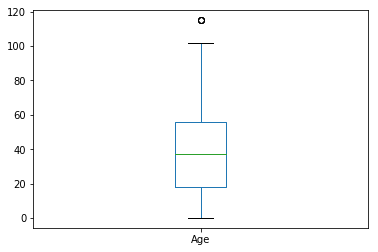

In [33]:
df.Age.plot(kind='box')

df.loc[df['Age']>100,'Age']=100
df.loc[df['Age']==100,'Age']

we explore outlier value

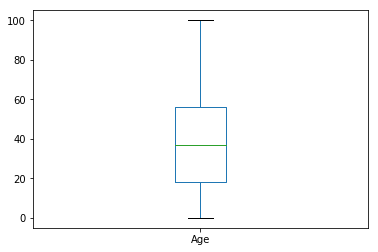

In [34]:
df.Age.plot(kind='box')

We get rid of irrational values 

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (There is a relationship betwwen the type of dieases has and showed,and which type odf dises has a greater impact)

In [35]:
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,1,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,1,0


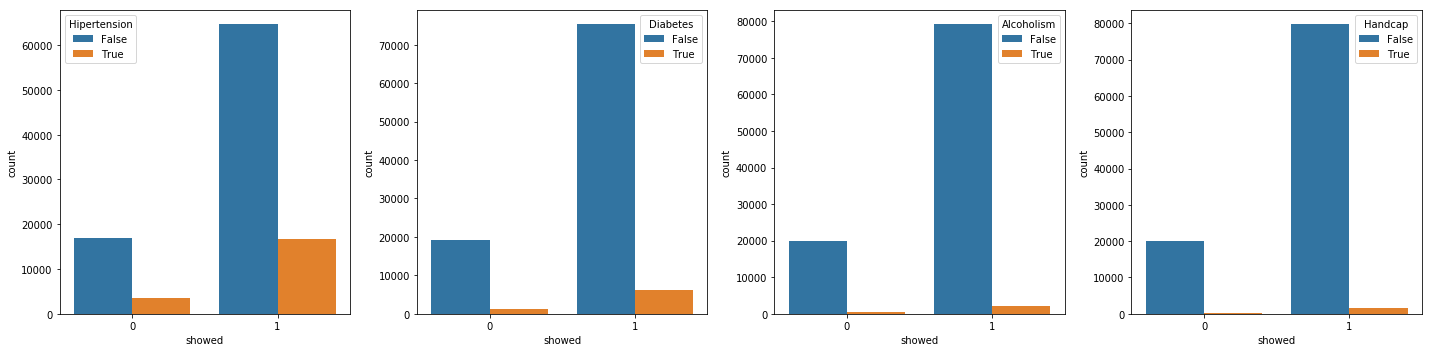

In [36]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
sns.countplot(x='showed' ,data=df,ax=ax[0],hue='Hipertension')
sns.countplot(x='showed' ,data=df,ax=ax[1],hue='Diabetes')
sns.countplot(x='showed' ,data=df,ax=ax[2],hue='Alcoholism')
sns.countplot(x='showed' ,data=df,ax=ax[3],hue='Handcap')
plt.tight_layout()

it is  seem that Hipertension the higher then other disease

In [37]:
show_up=df['showed'].value_counts()[1]

In [38]:
x=df.groupby('showed')['Hipertension'].value_counts()
h=(x[1][True]/df['Hipertension'].value_counts()[1])*100
h

82.900733108777487

82.9% of the people who attended had Hipertension 

In [39]:
y=df.groupby('showed')['Diabetes'].value_counts()
d=(y[1][True]/df['Diabetes'].value_counts()[1])*100
d

82.268543584190581

82.2% of the people who attended had Diabetes

In [40]:
z=df.groupby('showed')['Alcoholism'].value_counts()
a=(z[1][True]/df['Alcoholism'].value_counts()[1])*100
a

78.485064011379805

78.4% of the people who attended had Alcoholism 

Text(0.5,0,'type of disease')

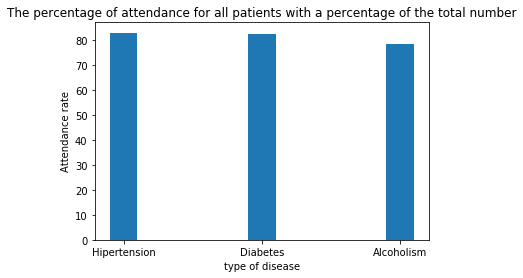

In [41]:
subset=[h,d,a]
X_axis = np.arange(len(subset))
lable=['Hipertension','Diabetes','Alcoholism']
plt.bar(X_axis,subset,.2)
plt.xticks(X_axis,lable)
plt.ylabel('Attendance rate')
plt.title('The percentage of attendance for all patients with a percentage of the total number')
plt.xlabel('type of disease')

It seems that I am the owner of the Hipertension appointment date and more than book an appointment

### Research Question 2  (Is there a relationship between attending the appointment and waiting days?)

In [42]:
sns.histplot(data=df,x='dayswaited',hue='showed')
plt.xlim([0,35])
plt.title('Explore the relationship between waiting days and appointment')
plt.legend(['show','no_show'])


AttributeError: module 'seaborn' has no attribute 'histplot'

In [43]:
df.loc[df['dayswaited']<20].groupby('showed')['dayswaited'].value_counts()[1].sum()

67645

In [44]:
df.loc[df['dayswaited']>20].groupby('showed')['dayswaited'].value_counts()[1].sum()

13008

I explain that the waiting period of less than 15 days is appropriate to attend the appointment, as the largest percentage attend the appointment when the period is less than 20 or 15

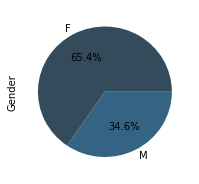

In [45]:
df.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('Blues_d'),figsize=(3,3))
#this is show that women take care of herself more than men or the most appointment is f

### Research Question 3  (Is there a relationship between attending the appointment and Gender?)

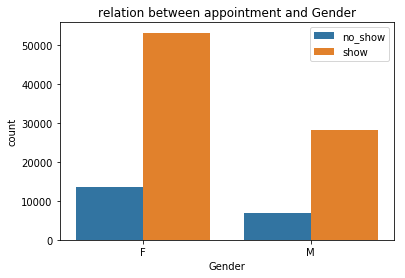

In [46]:
sns.countplot(data=df,x='Gender',hue='showed')
plt.title('relation between appointment and Gender')
plt.legend(['no_show','show'])

In [47]:
df.groupby('showed')['Gender'].value_counts()

showed  Gender
0       F         13452
        M          6968
1       F         53167
        M         28216
Name: Gender, dtype: int64

In [48]:
f_=df.groupby('showed')['Gender'].value_counts()[1]['F']
f_show=f_/df.Gender.value_counts()['F']*100
f_show

79.807562407121097

In [49]:
m_=df.groupby('showed')['Gender'].value_counts()[1]['M']
m_show=m_/df.Gender.value_counts()['M']*100
m_show

80.195543428831286

The number of women is more than men, but the percentage of attendance at the appointment is similar, despite a large difference in the number

### Research Question 4  (Is there a relationship between attending the appointment and Age  ?)

In [50]:
sns.histplot(data=df,x='Age',kde=True,hue='showed')
plt.xlim([0,100])

AttributeError: module 'seaborn' has no attribute 'histplot'

In [51]:
lable=['Childs','Adults','Seniors']
bins=[0,15,40,100]
df['Age_cust']=pd.cut(df['Age'],bins=bins,labels=['Childs','Adults','Seniors'])
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited,Age_cust
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,1,0,Seniors
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,1,0,Seniors
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,1,0,Seniors
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,1,0,Childs
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,1,0,Seniors


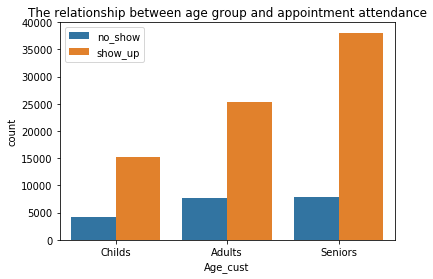

In [52]:
sns.countplot(x='Age_cust',data=df,hue='showed')
plt.title('The relationship between age group and appointment attendance')
plt.legend(['no_show','show_up'])

Age seems to be a major factor in attending the appointment, the seniors people attend appointment higher then other people

<a id='conclusions'></a>
## Conclusions

> In the beginning, we explained that the relationship between attending the appointment and the type of disease varies from one disease to another, but the percentage of infection with Hypertension is the largest percentage of the people on the appointment.

> Hypertension is factor for higher attendance frequency and Hypertension is strong feature for affect showing of the patients.

>The number of days between the day the patient called or registered the appointment and the day of the actual appointment seem to be an important factor where a low number of days seems to be associated with a lower chance of not showing for the appointment


>The number of women who attended to book their appointment, men, but the percentage of attending the appointment is close to them

>senoirs appear to have the highest showing percent among other groups,while youth was the least the difference between age groups is not remarkable


>despite women having average waiting period than the the average, which proved to be a factor correlated with showing up, women still showed up more than men

## limitation
>Missing data will be useful like  price and if he employed or not

>distance between the hospital and destination, insurance situation, education level would be helpful for better analysis

>doctor's specialty may also be correlated with missed appointment

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0